# Look at the big Picture

Welcome to **Machine Learning Housing Corporation!** The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block
group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

# Frame the problem

* Supervised learning task
* multiple regression problem (since we have multiple features)
* univariate regression problem (since we are only trying to predict a single value)

# Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import tarfile
from six.moves import urllib

# Download the data

In [37]:
# note: the download url "does not exist" but is the correct one to download the .tgz file
# using "https://github.com/ageron/handson-ml2/tree/master/datasets/housing" when dowloading the file via urlretrive will download
# the html page instead of the .tgz file and result in a READ ERROR when tryin to open the file

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Creates a datasets directrory in my workspace, downloads the housing.tgz file, and extracts the housing.csv from it in this directory"""
    if not os.path.isdir(HOUSING_PATH):
        os.makedirs(HOUSING_PATH)
    tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")
    urllib.request.urlretrieve(HOUSING_URL, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=HOUSING_PATH)
    housing_tgz.close()

# Read the data

In [39]:
housing = pd.read_csv("datasets/housing.csv")

In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [46]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


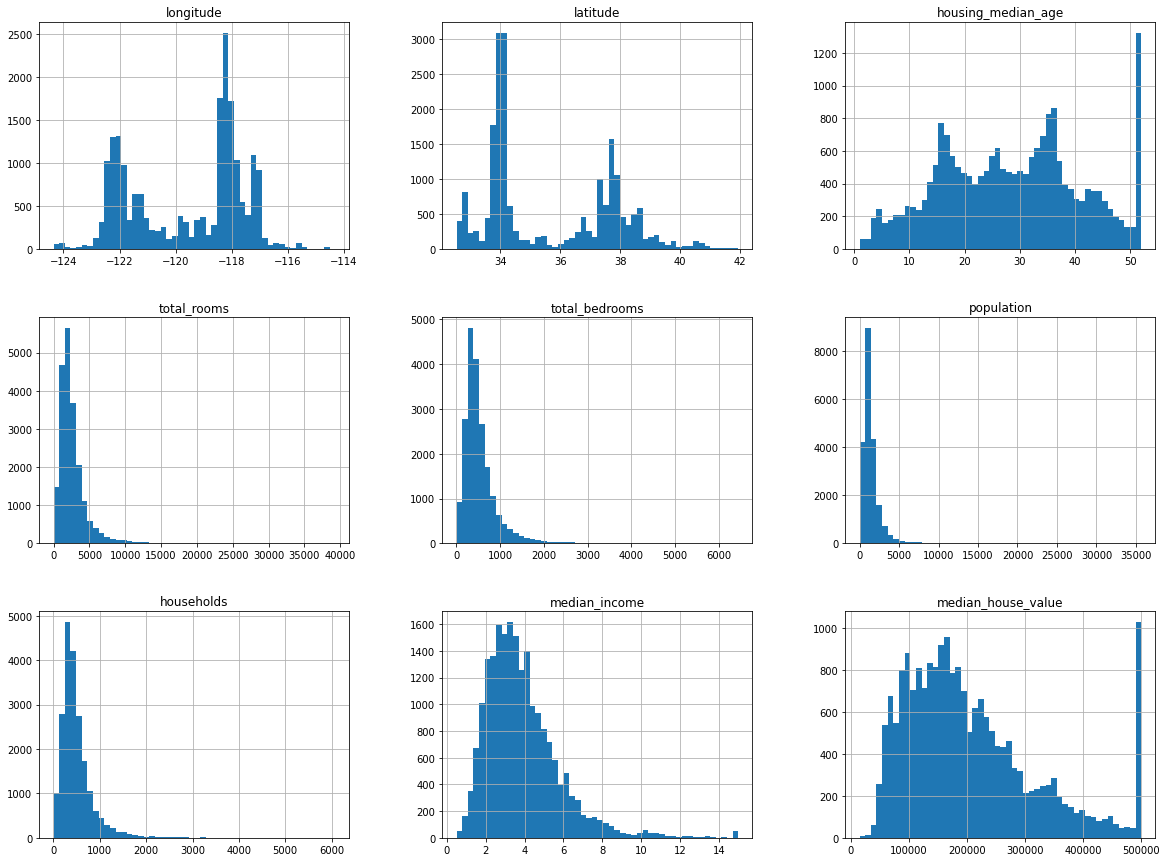

In [52]:
housing.hist(figsize=(20,15), bins=50);

* the numbers in the median_income have been caped at 15,001
* the numbers in the median_income are represented in tens of thousands (1=10,000\$)
* median_house_value has been capped at 500,000\$
* attributes have very different scales, which means they might need to be scaled
* Many histograms are tail heave: they extend much farther to the right of the median than to the left. this may make it a bit harder for some machine learning algorithms to detect patterns. we will try transforming these attributes later on the have more bell shaped distributions

# Split the data into a training and testing dataset

**import sklearn train_test_split**

In [53]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**take a look at the `median_income`**

<AxesSubplot:>

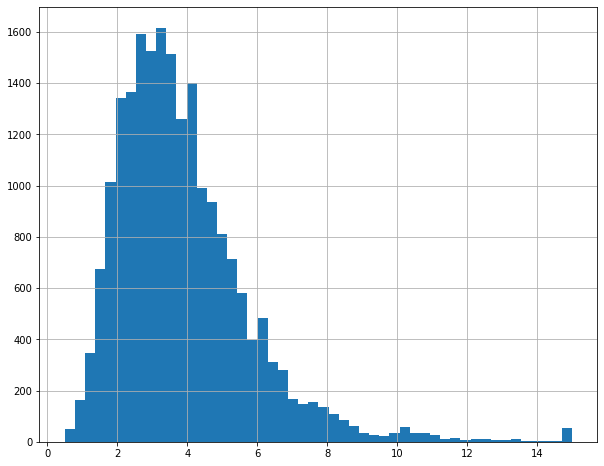

In [62]:
housing["median_income"].hist(figsize=(10,8), bins=50)

* most median income is between 1,5 and 6 (15,000\\$ and 60,000$)
* some incomes go far beyond 6
* it is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratums importance may be biased.

In [67]:
# the following cut uses the pd.cut() function to create an income category attribute with 5 categories
# category 1 ranges from 0 to 1.5, category 2 from 1.5 to 3 and so on...
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

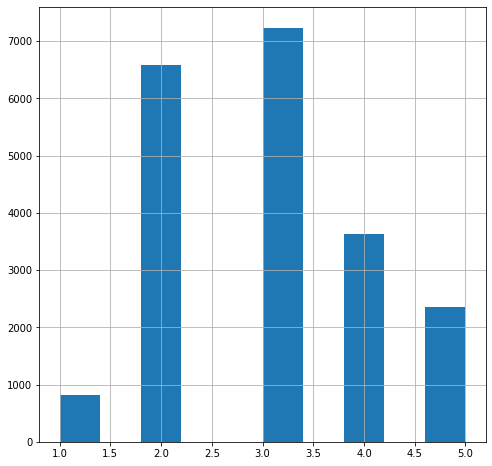

In [68]:
housing["income_cat"].hist(figsize=(8,8));

* now we are ready to to stratified sampling based on the income category. for this you can use Scikit-Learn's **StratifiedShuffleSplit** class
* follow <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html>link</a> to read more about this class

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

[12655 15502  2908 ... 19263 19140 19773]
[ 5241 17352  3505 ... 17223 10786  3965]


In [75]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

* this type of train, test split will be less skewed 
* create a StratifiedShuffleSplit instance and apply the split method to it passing in the features and the label 
* in each iteration we will append the new index to each of the splits

* now we should remove the `income_cat` attribute so the data is back to its original state.

In [83]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

**create a copy of the training set and store it in a variable**

this is done to avoid "harming" the training set

In [84]:
housing = strat_train_set.copy()

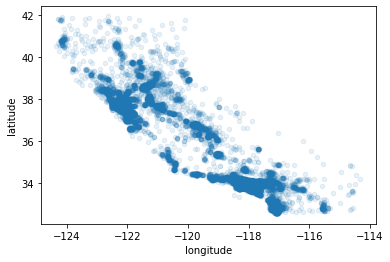

In [87]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

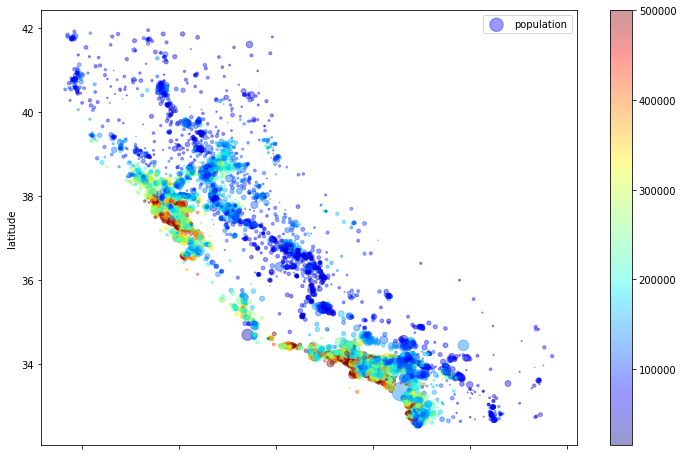

In [111]:
from math import ceil
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(12,8),
            color=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True);
